<a href="https://colab.research.google.com/github/ugoant/credit-card-fraud-detection/blob/main/CETM46.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies


In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score
from pylab import rcParams
rcParams["figure.figsize"] = 14, 8
Random_Seed = 42
Status = ["Normal", "Fraudulent"]

Load the dataset to a pandas dataframe

In [23]:
Available_Credit_card_data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

In [24]:
Available_Credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
Available_Credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [26]:
Available_Credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
Available_Credit_card_data.isnull().values.any()

False

Text(0, 0.5, 'Number_of_Times')

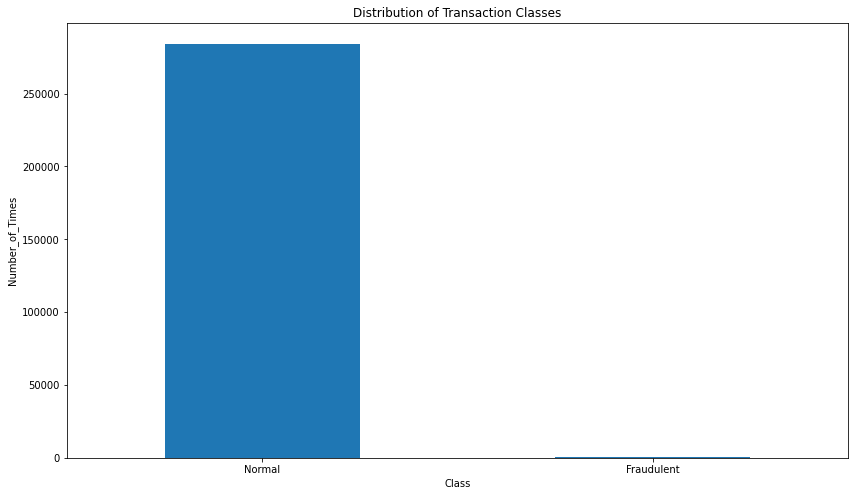

In [28]:
no_of_classes = pd.value_counts(Available_Credit_card_data["Class"], sort = True)
no_of_classes.plot(kind = "bar", rot = 0)
plt.title("Distribution of Transaction Classes")
plt.xticks(range(2), Status)
plt.xlabel("Class")
plt.ylabel("Number_of_Times")


*Listing both the Normal and Fraudulent Datasets*

In [29]:
Normal = Available_Credit_card_data[Available_Credit_card_data["Class"]==0]
Fraudulent = Available_Credit_card_data[Available_Credit_card_data["Class"]==1]

In [30]:
print(Normal.shape)

(284315, 31)


In [31]:
print(Fraudulent.shape)

(492, 31)


In [32]:
print(Available_Credit_card_data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.23709

Describing the Normal Transactions.

In [33]:
Normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Describing the Fraudulent Transactions.

In [34]:
Fraudulent.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

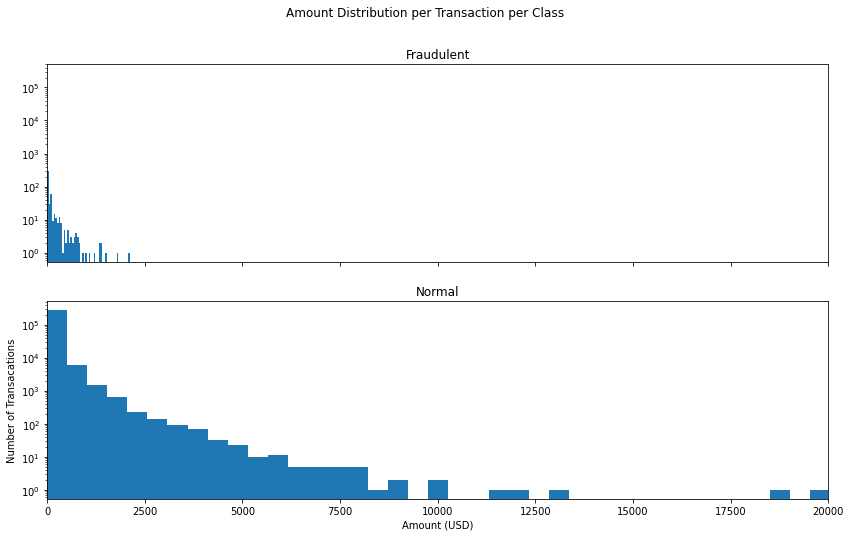

In [35]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True, sharey=True)
f.suptitle("Amount Distribution per Transaction per Class")
bins = 50
ax1.hist(Fraudulent.Amount, bins = bins)
ax1.set_title("Fraudulent")
plt.ylabel("Number of Transacations")

ax2.hist(Normal.Amount, bins = bins)
ax2.set_title("Normal")
plt.xlabel("Amount (USD)")
plt.ylabel("Number of Transacations")
plt.xlim((0, 20000))
plt.yscale("log")

plt.savefig("plot.png")

plt.show();

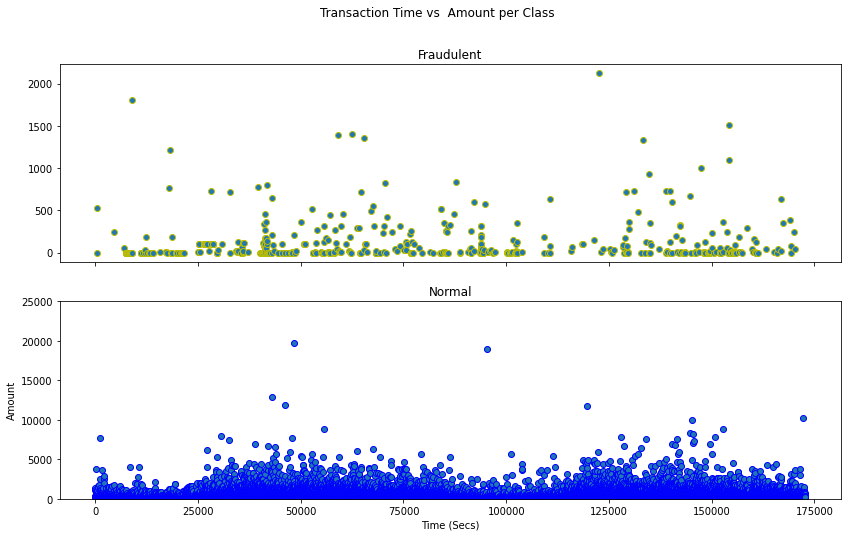

In [36]:
f, (ax1, ax2) = plt.subplots(2,1, sharex=True)
f.suptitle("Transaction Time vs  Amount per Class")
ax1.scatter(Fraudulent.Time, Fraudulent.Amount,edgecolors="y")
ax1.set_title("Fraudulent")

ax2.scatter(Normal.Time, Normal.Amount,edgecolors="b")
ax2.set_title("Normal")
plt.xlabel("Time (Secs)")
plt.ylabel("Amount")
plt.ylim(0, 25000)

plt.show()

*Taking some fraction sample of the Data*

In [37]:
Available_Credit_card_data1 = Available_Credit_card_data.sample(frac = 0.2,random_state=1)
Available_Credit_card_data1.shape

(56961, 31)

Plotting the histogram of each parameter

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38294e9090>,
      dtype=object)

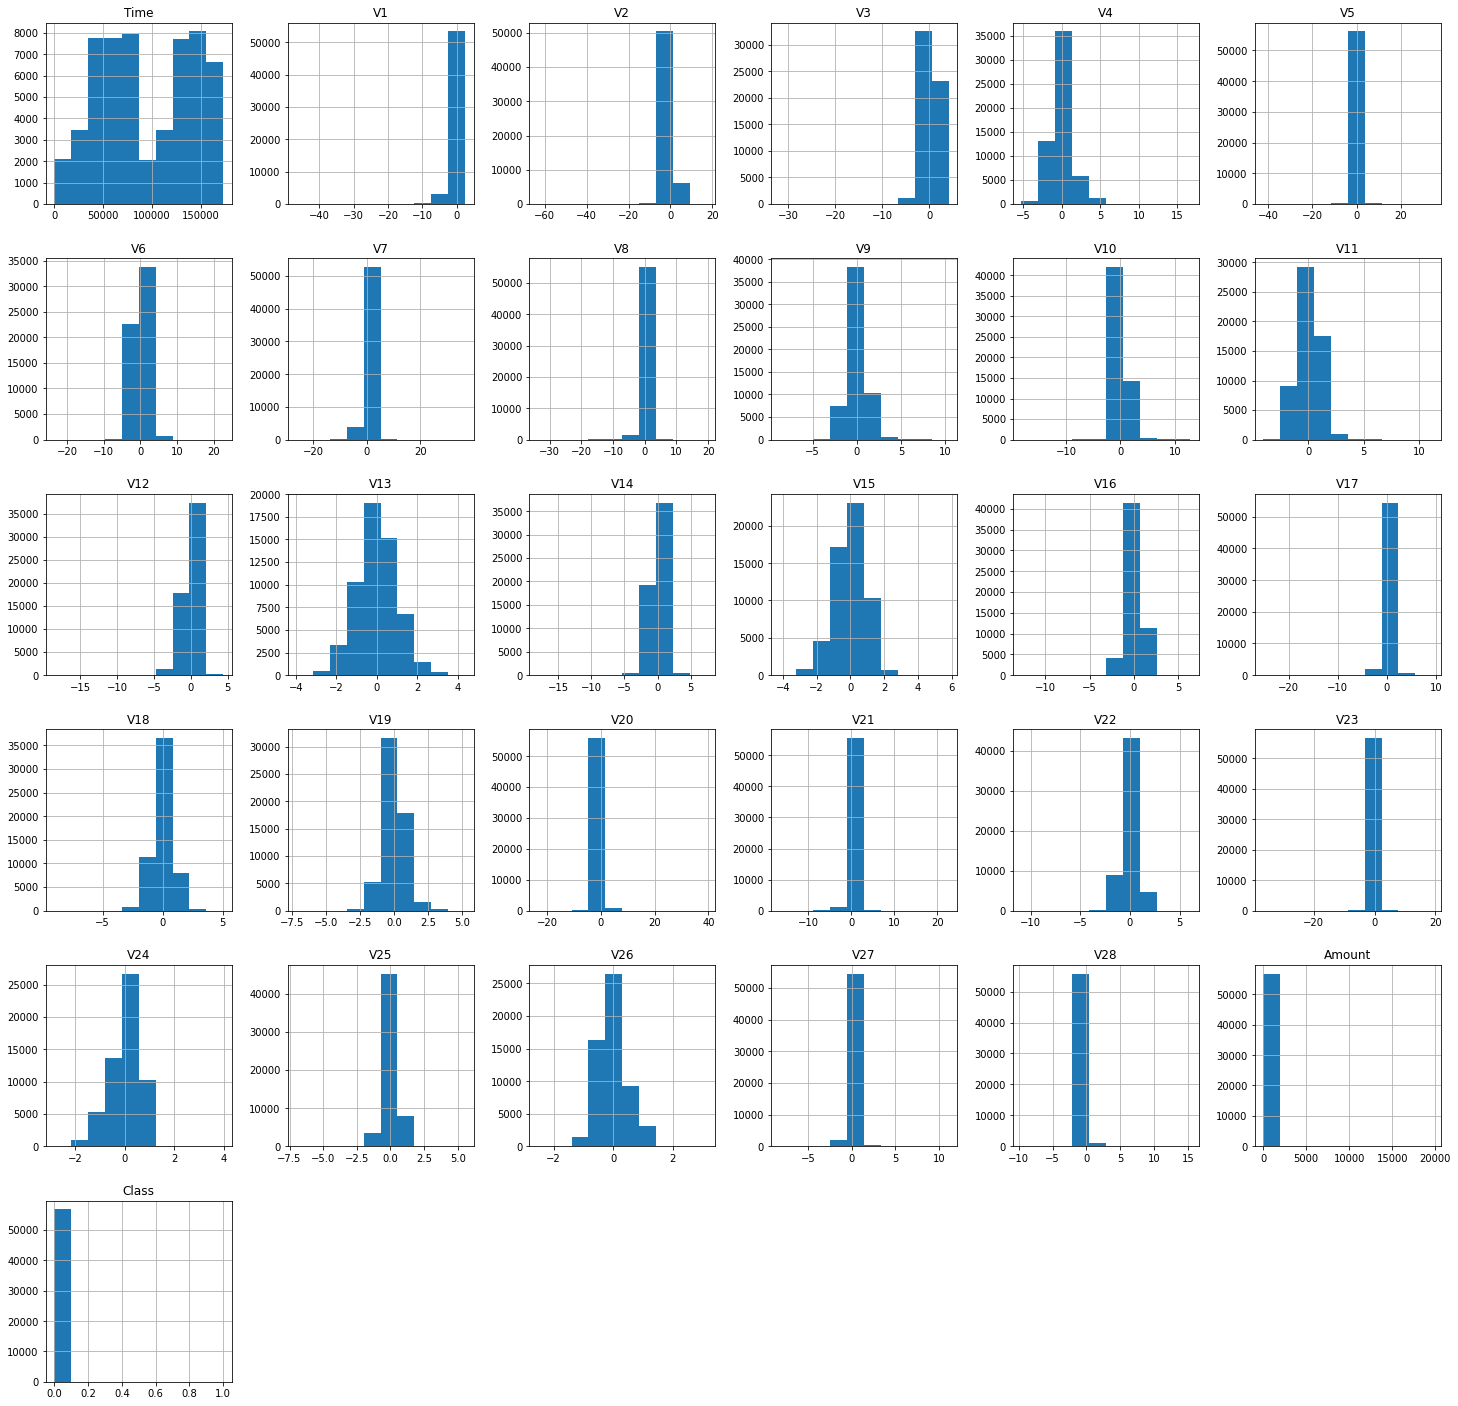

In [38]:
Available_Credit_card_data1.hist(figsize =(25,25))

Checking the number of Fraudulent and Normal Transactions in the new sample dataset

In [39]:
Fraudulent = Available_Credit_card_data1[Available_Credit_card_data1["Class"]==1]
Normal = Available_Credit_card_data1[Available_Credit_card_data1["Class"]==0]
outlier_fraction = len(Fraudulent)/float(len(Normal))
x_a = len(Fraudulent)
y_a = len(Normal)
print(outlier_fraction)
print(f"Fraudulent Cases : {x_a}")
print(f"Normal Cases : {y_a}")



0.0015296972254457222
Fraudulent Cases : 87
Normal Cases : 56874


Correlation

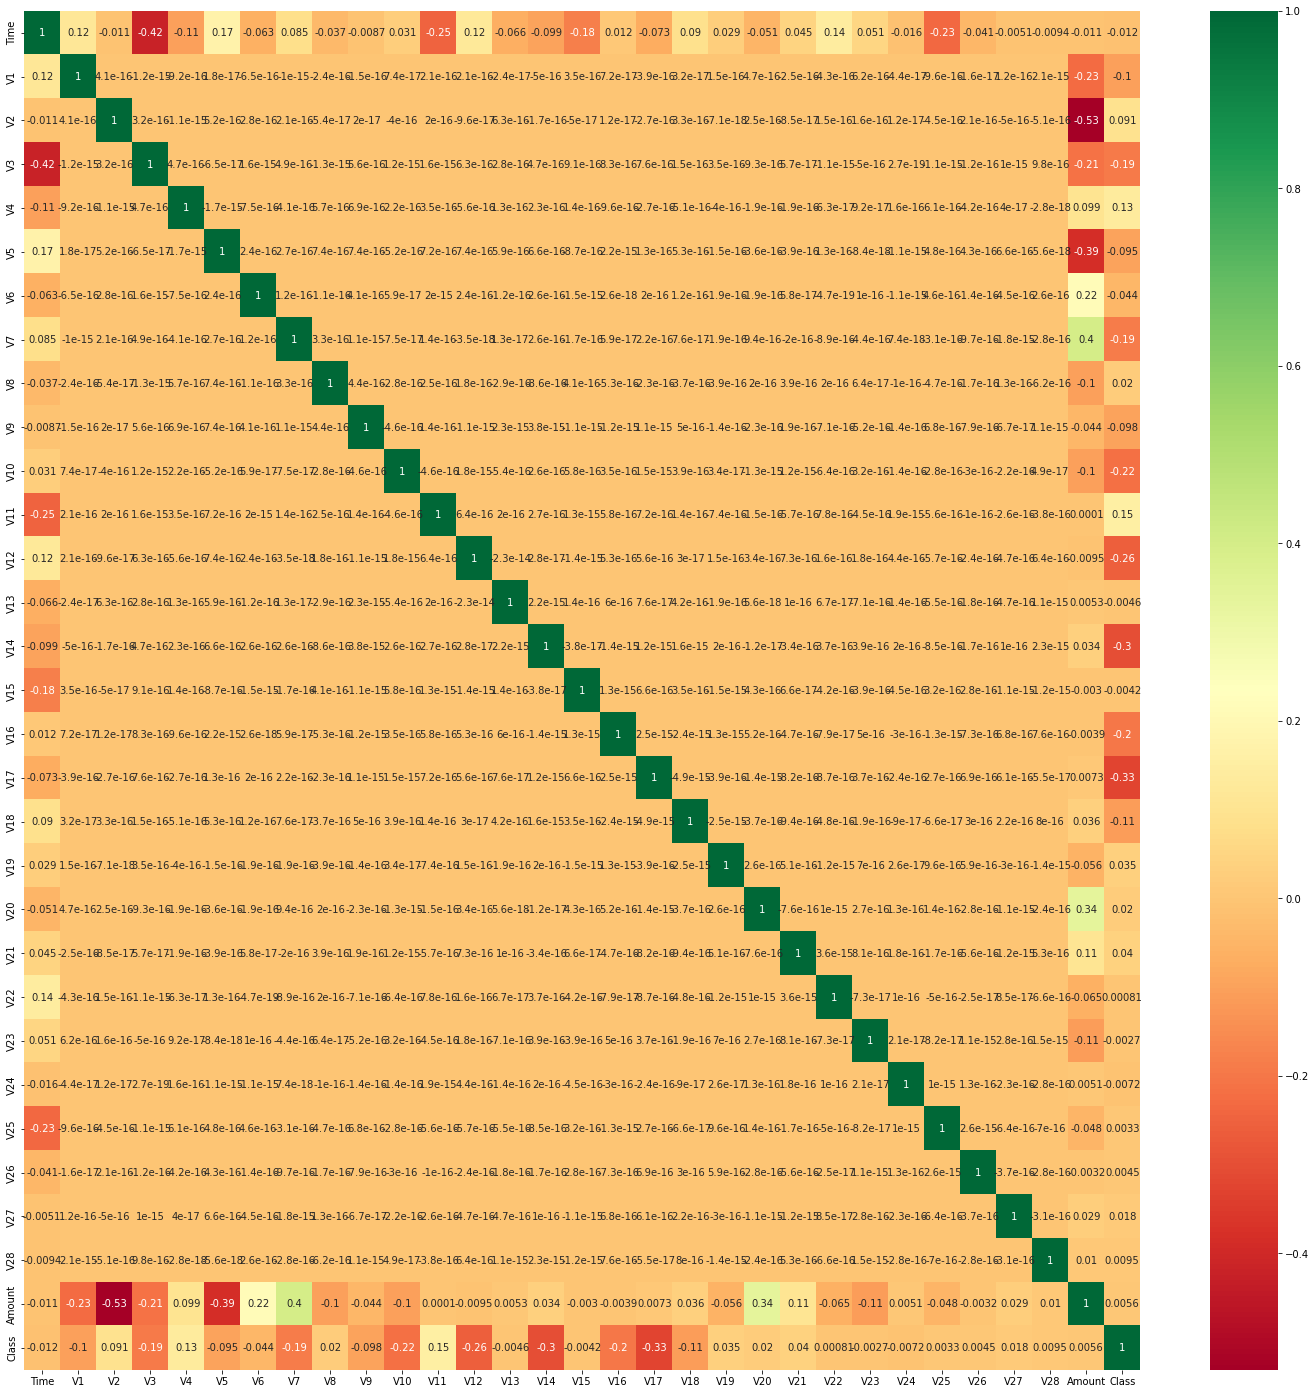

In [40]:
corrmat = Available_Credit_card_data1.corr()
corr_features = corrmat.index
plt.figure(figsize=(25,25))
g=sns.heatmap(Available_Credit_card_data[corr_features].corr(),annot=True,cmap="RdYlGn")